<a href="https://colab.research.google.com/github/aslam7861/Python/blob/main/Copy_of_eniac_common_group1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Head

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)


1) Categories-> App product, or with other beuatiful name....
2)

* Clean the data(Pipeline)
* Delete the data which are not complete probably....
* is Revenue increasign with discounts??


* Finding the black friday or some special day wherer the discounts are given a lot???
* price - unit price to find discounts


# APple products

In [3]:
def app_prod(x):
  if (str(x).str.startswith('APP')|x.str.startswith('AP2')) == True:
    return 'apple'
  else: return 'non_apple'

NameError: ignored

In [ ]:
# explore
print(orderlines.info())
print(orderlines.sample(3))
print(orders.info())
print(orders.sample(3))
print(brands.info())
print(brands.sample(3))
print(products.info())
print(products.sample(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293743 entries, 0 to 293742
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                293743 non-null  int64  
 1   id_order          293743 non-null  int64  
 2   product_id        293743 non-null  int64  
 3   product_quantity  293743 non-null  int64  
 4   sku               293743 non-null  object 
 5   unit_price        293743 non-null  float64
 6   date              293743 non-null  object 
 7   total_price       293743 non-null  float64
 8   check_orders      293743 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 18.2+ MB
None
             id  id_order  product_id  product_quantity      sku  unit_price  \
181547  1468469    452030           0                 1  APP2499      369.00   
160137  1434448    437870           0                 1  WAC0172       70.39   
268532  1609439    509602           0        

# Final Code

In [112]:
# clean the dataframes
orderlines = (
 orderlines
     .assign(date = lambda df_: pd.to_datetime(df_['date']))
     .drop(['product_id', 'check_orders'], axis=1)
     )

orders = (
 orders
     .assign(created_date = lambda df_: pd.to_datetime(df_['created_date']))
     .rename(columns={'created_date':'date','order_id' :'id_order' })
     .drop('check_orders', axis=1)
     )

#products = (
# products
#     .drop(['type'], axis=1)
#     )

# %% merge orders and orderlines and calculate the discount
df = (
orderlines
    .merge(orders, how="left", on='id_order')
    .drop('date_y', axis=1)
    .rename(columns={'date_x':'date'})
    .query('state == "Completed"')
    .reset_index(drop=True)
    .merge(products, how='left') 
    .assign(price = lambda df_: np.where(np.isnan(df_['price']),
                                         df_['max_price_orderlines'], df_['price']))
    .assign(discount = lambda df_: df_['price'] - df_['unit_price'],
            discount_perc = lambda df_: round((df_['discount'] * 100) / df_['price'])
            ))

KeyError: ignored

# Apple products vs All

In [6]:
df[df['sku'].str.startswith('APP') |df['sku'].str.startswith('AP2') ].shape, df.shape


((14006, 16), (62103, 16))

In [113]:
df['prod']= df['sku'].map(lambda x: 'apple' if ((x[:3]=='APP') | (x[:3]=='APP2')) else 'non_apple')

In [206]:
df['year']=df['date'].dt.strftime('%Y')


In [207]:
df['month']=df['date'].dt.strftime('%Y-%m')


In [208]:
dfapp=(df
.groupby(['prod', 'year','month'])
.agg({'id_order':'count', 'total_price':'sum', 'product_quantity':'sum', 'discount_perc':'mean'})
.reset_index()
)

In [209]:
qq=['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

In [180]:
dfapp.shape

(30, 7)

In [214]:
#ll =[int(a[-2:]) for a in dfapp['month']]
#[a%4 for a in ll]
def quarter(x):
  if x=='2017-01':
    return 'Q1'
  if x=='2017-02':
    return 'Q1'
  if x=='2017-03':
    return 'Q1'
  if x=='2017-04':
    return 'Q2'
  if x=='2017-05':
    return 'Q2'
  if x=='2017-06':
    return 'Q2'
  if x=='2017-07':
    return 'Q3'
  if x=='2017-08':
    return 'Q3'
  if x=='2017-09':
    return 'Q3'
  if x=='2017-10':
    return 'Q4'
  if x=='2017-11':
    return 'Q4'
  if x=='2017-12':
    return 'Q4'
  if x=='2018-01':
    return 'Q5'
  if x=='2018-02':
    return 'Q5'
  if x=='2018-03':
    return 'Q5'
  return 'none'

In [203]:
dfapp

'Q4'

In [218]:
dfapp['quarter']= dfapp['month'].map(lambda x: quarter(x))

In [219]:
dfapp

,prod,year,month,id_order,total_price,product_quantity,discount_perc,quater,quarter
0,apple,2017,2017-01,1119,371691.97,1290,23.759782,Q1,Q1
1,apple,2017,2017-02,421,202125.08,483,15.467626,Q1,Q1
2,apple,2017,2017-03,49,40825.34,54,12.387755,Q1,Q1
3,apple,2017,2017-04,360,186412.95,381,11.375000,Q2,Q2
4,apple,2017,2017-05,447,247372.32,517,9.190157,Q2,Q2
5,apple,2017,2017-06,432,306453.96,472,8.122685,Q2,Q2
6,apple,2017,2017-07,1116,537330.68,1215,16.191031,Q3,Q3
7,apple,2017,2017-08,603,314118.62,665,15.026622,Q3,Q3
8,apple,2017,2017-09,670,451399.23,708,12.164425,Q3,Q3
9,apple,2017,2017-10,895,500242.06,955,12.060335,Q4,Q4


In [222]:
dfs= dfapp.groupby(['quarter', 'prod']).agg({'id_order':'count', 'total_price':'sum', 'product_quantity':'sum', 'discount_perc':'mean' }).reset_index()

In [223]:
dfs

,quarter,prod,id_order,total_price,product_quantity,discount_perc
0,Q1,apple,3,614642.39,1827,17.205054
1,Q1,non_apple,3,1285087.14,9516,20.802154
2,Q2,apple,3,740239.23,1370,9.562614
3,Q2,non_apple,3,1066018.10,6670,17.939610
4,Q3,apple,3,1302848.53,2588,14.460693
5,Q3,non_apple,3,1392991.73,9428,23.093124
6,Q4,apple,3,2885520.03,5475,11.878311
7,Q4,non_apple,3,2981070.36,18019,23.040639
8,Q5,apple,3,1669423.19,2843,13.199717
9,Q5,non_apple,3,1771864.12,11895,22.969486


In [225]:
df['quarter']= df['month'].map(lambda x: quarter(x))

In [226]:
dfss= df.groupby(['quarter', 'prod']).agg({'id_order':'count', 'total_price':'sum', 'product_quantity':'sum', 'discount_perc':'mean' }).reset_index()

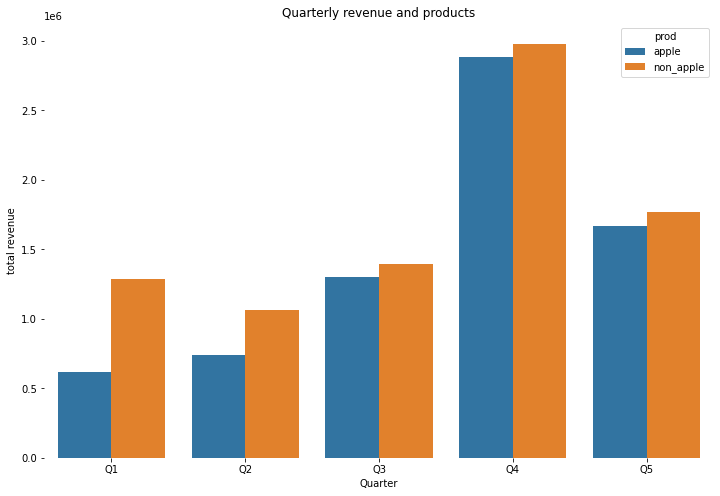

In [230]:
plt.subplots(figsize=(12, 8))
sns.barplot(data= dfss, x='quarter', y='total_price', hue='prod')
plt.xlabel('Quarter')
plt.ylabel('total revenue')
plt.title('Quarterly revenue and products')
sns.despine(top=True, right=True, left=True, bottom=True)


In [197]:
dfapp.head(2)

,prod,year,month,id_order,total_price,product_quantity,discount_perc,quater
0,apple,2017,2017-01,1119,371691.97,1290,23.759782,nan
1,apple,2017,2017-02,421,202125.08,483,15.467626,nan


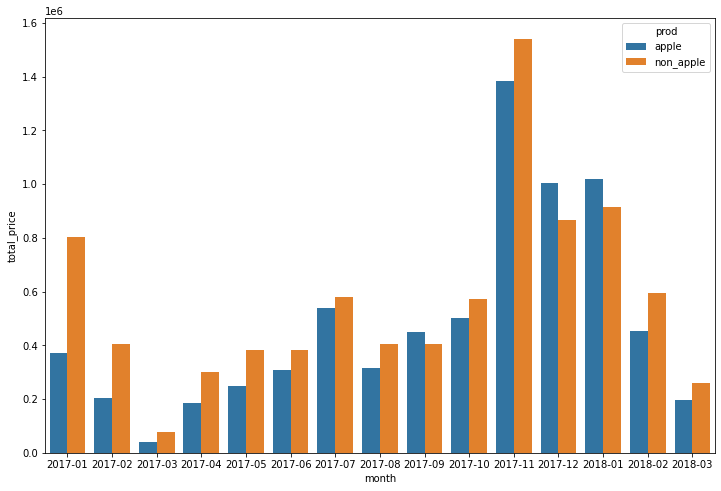

In [153]:
plt.subplots(figsize=(12, 8))
sns.barplot(data= dfapp, x='month', y='total_price', hue='prod')



In [118]:
df['year']=df['year'].map(lambda x: int(x))

NameError: ignored

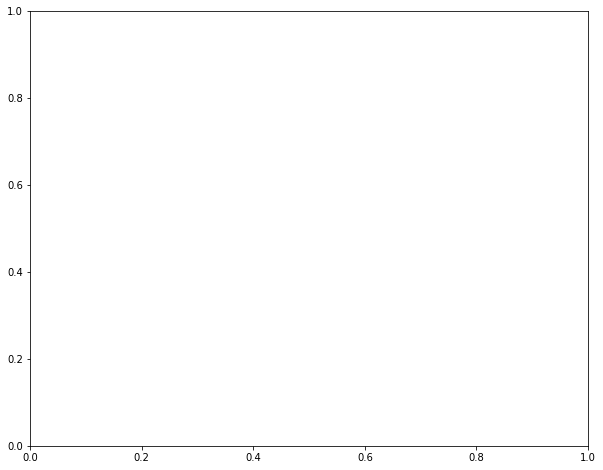

In [141]:
dfs = (df
  .assign(year = df['date'].dt.strftime('%y-%m'), month = df['date'].dt.strftime('%m')) # create year and month
  .groupby(['prod', 'year', 'month']).agg({'discount': 'sum', 'total_paid': 'sum', 'discount_perc':'mean'})
  .sort_values(by=['year', 'month'], ascending=True).reset_index()
)
#discoplot['discount'] = discoplot['discount']*3 # boost discount line
# print(discoplot)

# plot by seaborn


plt.subplots(figsize=(10, 8))
sns.barplot(data=discoplot, x='year', y='total_paid', hue ='prod')
x_values = range(len(dfs['month']))
plt.plot(x_values, data=dfs['discount'])
plt.plot(x_values, dfs['total_paid'])
#plt.xlabel('Time')
#plt.ylabel('Revenue')
plt.show()

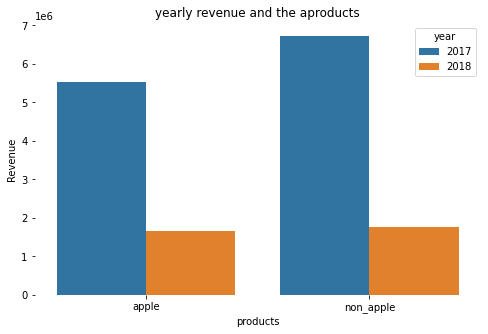

In [119]:
plt.subplots(figsize=(8,5))
sns.barplot(data=dfapp, x= 'prod', y='total_price', hue='year')
plt.xlabel('products')
plt.ylabel('Revenue')
plt.title('yearly revenue and the aproducts')
sns.despine(top=True, right=True, left=True, bottom=True)

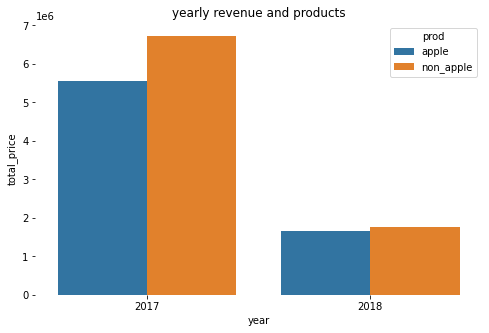

In [139]:
plt.subplots(figsize=(8,5))
sns.barplot(data=dfapp, x= 'year', y= 'total_price', hue = 'prod')#, hue='year')
plt.xlabel('year')
#plt.ylabel('total revenue')
plt.title('yearly revenue and products')
sns.despine(top=True, right=True, left=True, bottom=True)

In [123]:
df['year'] = pd.to_numeric(df['year'])

In [129]:
dfapp

,prod,year,id_order,total_price,product_quantity,discount_perc
0,apple,2017,10345,5543250.18,11260,13.917790
1,apple,2018,2671,1669423.19,2843,12.156121
2,non_apple,2017,38571,6725167.33,43633,22.312139
3,non_apple,2018,10516,1771864.12,11895,23.251261


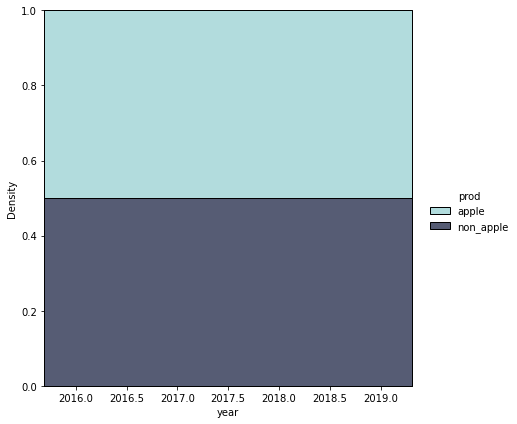

In [127]:
sns.displot(
    data=dfapp,
    x="year", hue="prod",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

Text(0, 0.5, 'Revenue')

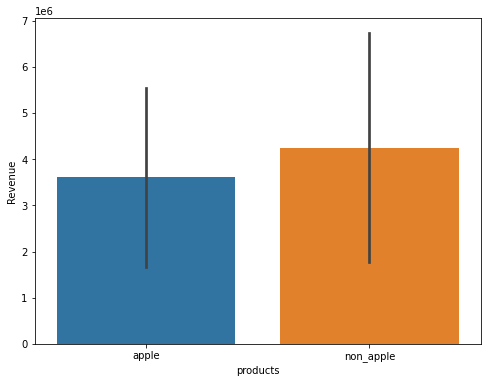

In [76]:
plt.subplots(figsize=(8,6))
sns.barplot(data=dfapp, x= 'prod', y='total_price')#, hue='year')
plt.xlabel('products')
plt.ylabel('Revenue')
#sns.barplot(data=dfapp, x= 'prod', y='discount_perc')

Text(0, 0.5, 'Revenue')

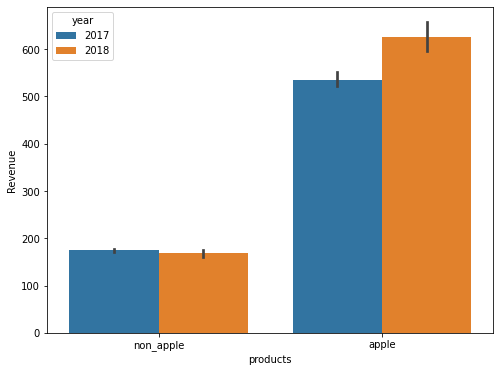

In [83]:
plt.subplots(figsize=(8,6))
sns.barplot(data=df, x= 'prod', y='total_price', hue='year')
plt.xlabel('products')
plt.ylabel('Revenue')
#sns.barplot(data=dfapp, x= 'prod', y='discount_perc')

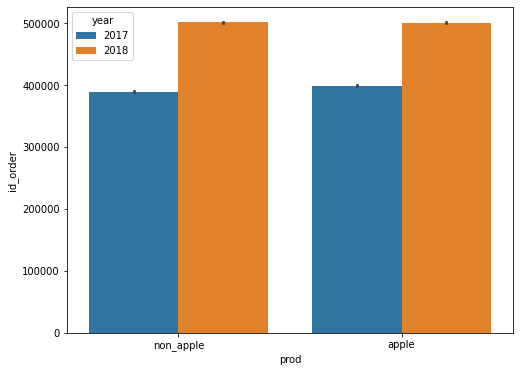

In [48]:
#plt.sublots(figsize=(8,6))
plt.subplots(figsize=(8,6))
sns.barplot(data=df, x= 'prod', y='id_order', hue='year')

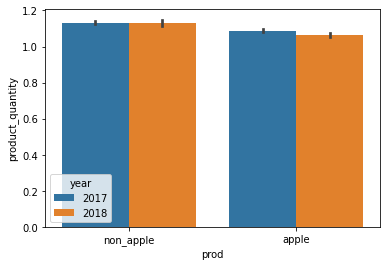

In [35]:
sns.barplot(data=df, x= 'prod', y='product_quantity', hue='year')

In [14]:
dfapp

,prod,id_order,total_price,discount_perc
0,apple,13016,7212673.37,13.555444
1,non_apple,49087,8497031.45,22.514521


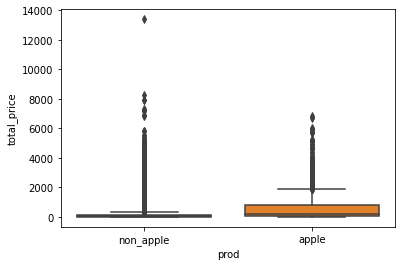

In [25]:
sns.boxplot(data=df, x='prod', y='total_price')

# new helper method to auto-label bars (matplotlib 3.4.0+)


In [ ]:
print(df.sample(10))

            id  id_order  product_quantity      sku  unit_price  \
59185  1622628    515451                 1  OWC0092       49.99   
35138  1422863    432406                 1  DLL0015      442.74   
8026   1176417    322286                 1  LIF0097       59.99   
30800  1387812    417320                 1  SAT0054       79.99   
37066  1435855    438538                 1  APP1968      351.85   
39351  1450429    444858                 1  WAC0169       79.19   
32744  1400419    423354                 1  ALL0019       16.99   
31314  1391592    419180                 2  MOS0225       17.84   
9057   1183691    325487                 1  SAT0013       23.99   
22918  1317371    389143                 1  OWC0216       44.99   

                     date  total_price  total_paid      state  \
59185 2018-02-21 14:05:50        49.99       54.98  Completed   
35138 2017-11-22 22:02:51       442.74      442.74  Completed   
8026  2017-02-10 14:31:46        59.99       64.98  Completed   
30

# Kind of Plotting

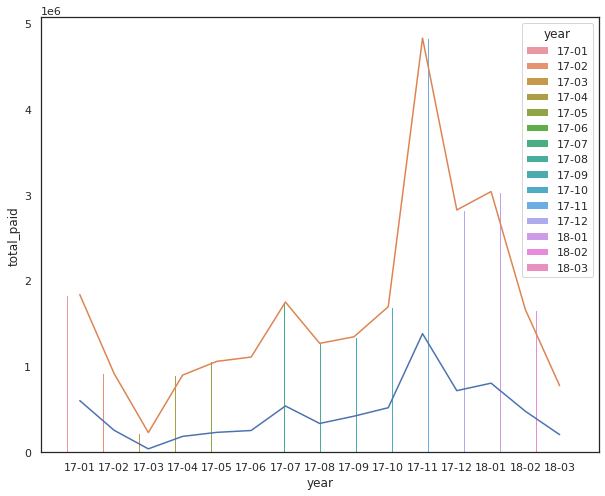

In [ ]:
# add some plot categories (by Sebastian)

# shorter version like this:
discoplot = (df
  .assign(year = df['date'].dt.strftime('%y-%m'), month = df['date'].dt.strftime('%m')) # create year and month
  .groupby(['year', 'month']).agg({'discount': 'sum', 'total_paid': 'sum', 'discount_perc':'mean'})
  .sort_values(by=['year', 'month'], ascending=True).reset_index()
)
discoplot['discount'] = discoplot['discount']*3 # boost discount line
# print(discoplot)

# plot by seaborn


plt.subplots(figsize=(10, 8))
sns.barplot(data=discoplot, x='year', y='total_paid', hue ='year')
x_values = range(len(discoplot['month']))
plt.plot(x_values, discoplot['discount'])
plt.plot(x_values, discoplot['total_paid'])
plt.show()

In [ ]:
discoplot

,year,month,discount,total_paid,discount_perc
0,17-01,01,602987.76,1838616.32,24.06
1,17-02,02,257026.05,919384.27,19.14
2,17-03,03,40204.35,229980.81,17.45
3,17-04,04,185652.12,899330.97,17.65
4,17-05,05,232529.07,1060090.01,15.15
5,17-06,06,254086.26,1110100.67,16.41
6,17-07,07,539749.14,1751133.39,24.00
7,17-08,08,336108.78,1269774.21,19.92
8,17-09,09,420924.81,1346267.46,19.55
9,17-10,10,519595.02,1696911.21,21.23


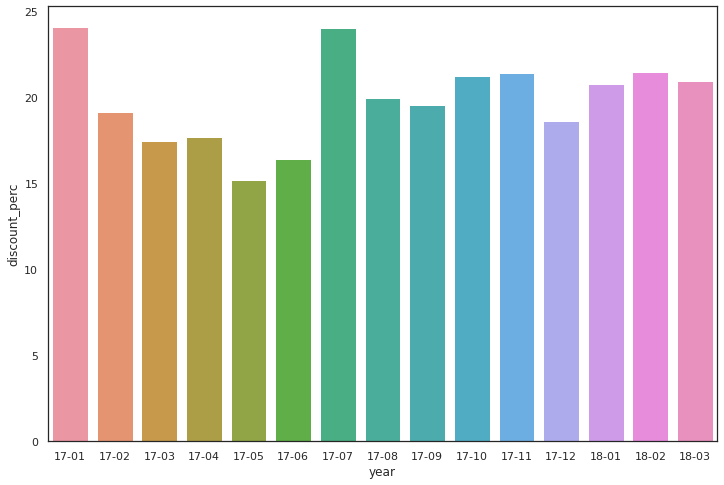

In [ ]:
plt.subplots(figsize=(12,8))
sns.barplot(data=discoplot, x= 'year', y='discount_perc')

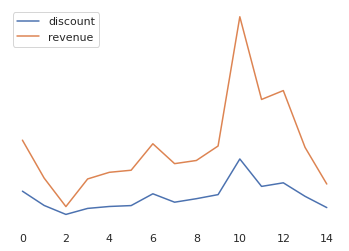

In [ ]:
# add some plot categories (by Sebastian)

# shorter version like this:
discoplot = (df
  .assign(year = df['date'].dt.strftime('%Y'), month = df['date'].dt.strftime('%m')) # create year and month
  .groupby(['year', 'month']).agg({'discount': 'sum', 'total_paid': sum})
  .sort_values(by=['year', 'month'], ascending=True).reset_index()
)
discoplot['discount'] = discoplot['discount']*3 # boost discount line
# print(discoplot)

"""
# plot it
x_values = range(len(discoplot['month']))
plt.plot(x_values, discoplot['discount'])
plt.plot(x_values, discoplot['total_paid'])
ax = plt.subplot(); ax.set_xticks(x_values); ax.set_xticklabels(discoplot['month'])
plt.show()
"""

# plot by seaborn
sns.set_theme()
sns.set_style('white')
x_values = range(len(discoplot['month']))
ax = sns.lineplot(x=x_values, y="discount", data=discoplot)
ax.set(xlabel=None, ylabel=None)
ax.set_yticks([])
plt.plot(x_values, discoplot['total_paid'])
plt.legend(['discount', 'revenue'], loc=2)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

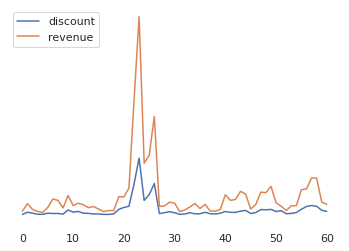

In [ ]:
# zoom in for christmas

discoplot_nov_dec = (df
  .assign(year = df['date'].dt.strftime('%Y'), month = df['date'].dt.strftime('%m'), day = df['date'].dt.strftime('%d')) # create year and month
  .groupby(['year', 'month', 'day']).agg({'discount': 'sum', 'total_paid': sum})
  .sort_values(by=['year', 'month', 'day'], ascending=True).reset_index()
  .query('month == "11" | month == "12"')
)
discoplot_nov_dec['discount'] = discoplot_nov_dec['discount']*3 # boost discount line
# print(discoplot_nov_dec)

# plot by seaborn
sns.set_theme()
sns.set_style('white')
x_values = range(len(discoplot_nov_dec['day']))
ax = sns.lineplot(x=x_values, y="discount", data=discoplot_nov_dec)
ax.set(xlabel=None, ylabel=None)
ax.set_yticks([])
plt.plot(x_values, discoplot_nov_dec['total_paid'])
plt.legend(['discount', 'revenue'], loc=2)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

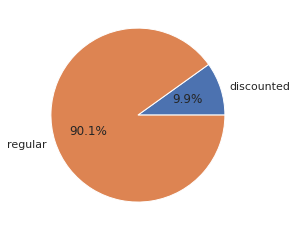

In [ ]:
# How many products are being discounted?
# sum where discount.sum == 0
# sum where discount.sum != 0
disco_ = (df
  .query('discount == 0')
  .groupby(['sku']).agg({'sku': 'count'})
)
disco_yes=len(disco_.index)

disco_ = (df
  .query('discount != 0')
  .groupby(['sku']).agg({'sku': 'count'})
)
disco_no=len(disco_.index)

# plot it
x_values = [disco_yes, disco_no]
labeling = ['discounted', 'regular']

plt.pie(x_values, labels=labeling, autopct='%0.1f%%')
plt.show()

# Creating product categories

In [ ]:
import re

In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

In [ ]:
categories = ['Mac', 'iPhone', 'Accessories', 'iPad', 'Watch', 'Storage', 'Services']

In [ ]:
products = products[products['sku'].isin(df['sku'])]

In [ ]:
# adding a category column filled with nan
products['category'] = np.nan

In [ ]:
# defining regex for iPhone, Mac, and iPad categories
iphone_regex = re.compile(r"apple iphone.*gb", flags=re.I)
mac_regex = re.compile(r"apple i?mac.*gb", flags=re.I)
ipad_regex = re.compile(r"apple ipad.*gb", flags=re.I)

In [ ]:
# from collections import Counter
# Counter(" ".join(products[products.name.str.contains(re.compile(r"^apple i?mac", flags=re.IGNORECASE))].name).split()).most_common(10)

In [ ]:
# Creating lists of category_regex and category_names to use in the for loop to\ 
# fill the category column
category_regex = [iphone_regex, mac_regex, ipad_regex]
category_names = ['iPhone', 'Mac', 'iPad']

In [ ]:
# filling in the category column with iPhone, Mac, and iPad category names
for x, y in zip(category_regex, category_names):
  products.loc[products['name'].str.contains(x, regex=True), 'category'] = y

In [ ]:
# defining regex for Watch category
watch_regex = re.compile(r"apple watch", flags=re.I)

In [ ]:
# filling in the category column with Watch category name using watch_regex and\
# a list of Watch type numbers found from exploring the name column
(products
    .loc[products['name'].str.contains(watch_regex, regex=True) & 
         products['type'].isin(['24885185' , '24895185']), 
         'category'] 
) = "Watch"

In [ ]:
# defining lists of type numbers belonging to other categories found from exploring\
# the name column of the observations that so far has nan in their category column
accessories_types = ['11865403', '11905404', '12635403', '13835403', '12585395',\
                    '1296', '5384', '1325', '5398', '1334', '1229', '12995397'\
                    '13615399', '1404', '8696', '13855401', '1387', '1230',\
                    '1325', '1334', '13005399','12995397', '13955395','1276',\
                    '12635403','12355400','1404','101781405','12085400', '9094',\
                    '14305406','10142', '12645406','10230','14365395','5395',\
                    '13555403','21485407','12575403','14035403','1216','1515',\
                    '1392','5,49E+11','5398','1296','1375','5405','12285400',\
                    '5720','15435404','24215399','11434','2425','2434','2449',\
                    '54864259','5403','21535407', '5407','5406','5404','54025401',\
                    '5401','5399','11859']
storage_types = ['11935397', '12175397', '1364', '12215397', '1433', '57445397',\
                '12655397','12755395', '11935397', '1424','57445397','1280',\
                '11821715','42945397','4259','54085407','79201715','113464259']
service_types = ['1,44E+11','20642062','1,46E+11','1231','1416']
iphone_types = ['51601716','24821716','1716']
mac_types = ['1282']
watch_types = ['24895185']
open_products_types = ['1298']


In [ ]:
# defining lists of category types and category names to use in the for loop to\ 
# replace the rest of the nan in the category column
category_types = [accessories_types, storage_types, service_types, iphone_types, mac_types, watch_types,\
                  open_products_types]
category_names = ['Accessories', 'Storage', 'Service', 'iPhone', 'Mac', 'Watch']

In [ ]:
for x, y in zip(category_types, category_names):
  products.loc[products['type'].isin(x), 'category'] = y

In [ ]:
# using merge to add the category column in the final df
df = pd.merge(df,products[['sku','category']],on='sku', how='left')
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'category_x'} in the result is deprecated and will raise a MergeError in a future version.
  


(62103, 22)

(5985, 7)

#. How many products are being discounted

Text(0, 0.5, 'total order')

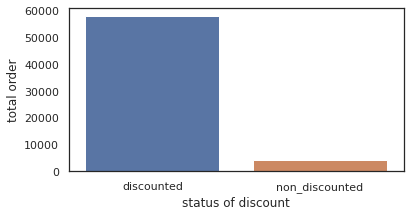

In [ ]:
df['discounts'] = df['discount_perc'].map(lambda x: 'discounted' if x!=0 else 'non_discounted')
disc_order=df.groupby('discounts').agg(total_order=('id_order','count')).reset_index()
plt.subplots(figsize=(6, 3))
tt=sns.barplot(data= disc_order, x='discounts', y='total_order')
plt.xlabel('status of discount')
plt.ylabel('total order')

In [ ]:
df.shape

(62103, 19)

# products should be classified into different categories

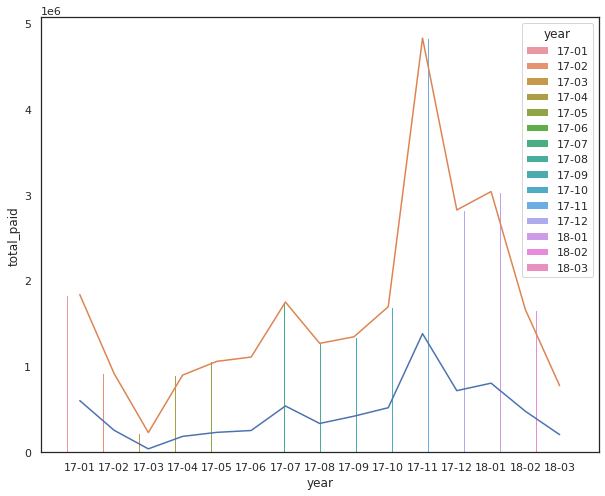

In [ ]:
discoplot = (df
  .assign(year = df['date'].dt.strftime('%y-%m'), month = df['date'].dt.strftime('%m')) # create year and month
  .groupby(['year', 'month']).agg({'discount': 'sum', 'total_paid': 'sum', 'discount_perc':'mean'})
  .sort_values(by=['year', 'month'], ascending=True).reset_index()
)
discoplot['discount'] = discoplot['discount']*3 # boost discount line
# print(discoplot)

# plot by seaborn


plt.subplots(figsize=(10, 8))
sns.barplot(data=discoplot, x='year', y='total_paid', hue ='year')
x_values = range(len(discoplot['month']))
plt.plot(x_values, discoplot['discount'])
plt.plot(x_values, discoplot['total_paid'])
plt.show()

In [ ]:
cat_perc=df.groupby('category', ).agg({'discount_perc':'mean'}).sort_values('discount_perc').reset_index()

In [ ]:
cat_perc['discount_perc'].sum()

94.41081191327147

# discounts as a percentage of the product prices.

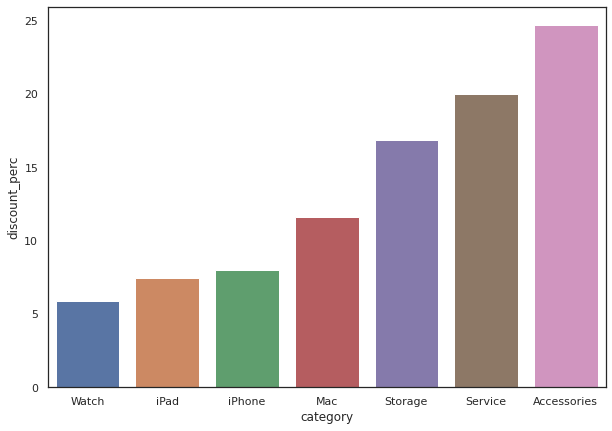

In [ ]:
plt.subplots(figsize=(10, 7))
sns.barplot(data=cat_perc, x='category', y='discount_perc')

In [ ]:
[a for a in cat_perc['category']]

['Watch', 'iPad', 'iPhone', 'Mac', 'Storage', 'Service', 'Accessories']

In [ ]:
[round(a,1) for a in cat_perc['discount_perc']]

[5.9, 7.4, 8.0, 11.6, 16.9, 20.0, 24.7]

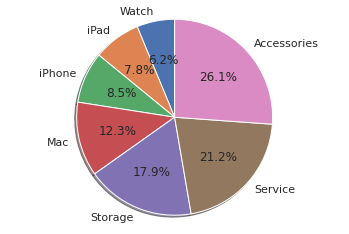

In [ ]:
labels = 'Watch', 'iPad', 'iPhone', 'Mac', 'Storage', 'Service', 'Accessories'
sizes = [5.9, 7.4, 8.0, 11.6, 16.9, 20.0, 24.7]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#g1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Some plots regarding categories

In [ ]:
df.shape

(62103, 18)

In [ ]:
df.head(3)

,id,id_order,product_quantity,sku,unit_price,date,total_price,total_paid,state,name,desc,price,type,max_price_orderlines,discount,discount_perc,category,perc
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD iMac 2011,Kit temperature sensor for HDD iMac 21 inch and 27 inch 2011.,60.99,12755395,NaN,13.50,22.00,Storage,discounted
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,18.99,Completed,iOttie Easy View 2 Car Black Support,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s / 5c / 4S,22.95,5720,NaN,3.96,17.00,Accessories,discounted
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,72.19,Completed,"Apple 85W MagSafe 2 charger MacBook Pro screen Retina 15 ""(OEM)",Apple MagSafe 2 Charger for MacBook Pro 15-inch Retina 85W unboxed,89.00,13005399,NaN,16.81,19.00,Accessories,discounted


In [ ]:
df_perc_only = df.query('discount_perc >0')


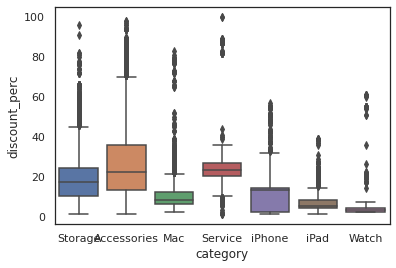

In [ ]:
sns.boxplot(data=df_perc_only, x= 'category', y='discount_perc')

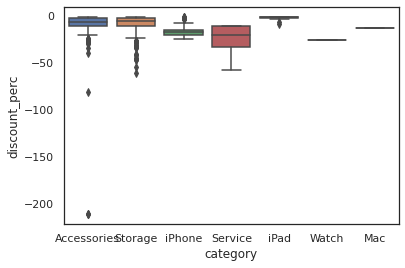

In [ ]:
df_perc_neg = df.query('discount_perc <0')
df_perc_neg.shape
sns.boxplot(data=df_perc_neg, x= 'category', y='discount_perc')

In [ ]:
#sns.boxplot(data=df_wit_perc_only, x='category', y='discount_perc');

NameError: ignored

In [ ]:
q2 = df.groupby('category').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
tt=sns.barplot(data=q2, x='category', y='price', ci='sd')
tt.axhline(
    df['price'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Categories')
plt.ylabel('Average price')

In [ ]:
q2 = df.groupby('category').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
tt=sns.violinplot(data=products, x='category', y='price', ci='sd')
tt.axhline(
    df['price'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Categories')
plt.ylabel('Average price')

In [ ]:
q2 = df.groupby('category').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
tt=sns.boxplot(data=products, x='category', y='price')
tt.axhline(
    df['price'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Categories')
plt.ylabel('Average price')

In [ ]:
dd=df.groupby('category').agg(total_products=('category','count') ).sort_values('total_products', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
sns.barplot(data=dd, y='category', x='total_products')
sns.despine(top=True, right=True, left=True, bottom=True)

# Experiments

In [ ]:
df_perc_only = df.query('discount_perc > 0')
# print(df_wit_perc)
sns.boxplot(data=df_perc_only, x='category', y='discount_perc');
# add range here? between 0 and 100

In [ ]:
q2 = df.groupby('category').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
tt=sns.boxplot(data=products, x='category', y='price')
tt.axhline(
    df['discount_perc'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Categories')
plt.ylabel('Average price')

In [ ]:
# Sebastian says

# sum of products - apple/non-apple
products['short_sku'] = products['sku'].str[0:3]
products['cat'] = ['Apple' if (x == 'APP' or x == 'AP2') else 'Others' for x in products['short_sku']] # this is the filter
pro_by_cat = (products[['cat', 'short_sku']]
  .groupby('cat').count()
  .reset_index()
)
# print(pro_by_cat)

# plot it
plt.bar(range(len(pro_by_cat['cat'])), pro_by_cat['short_sku'])
plt.title('sample categories')
plt.xlabel('sorted by')
plt.ylabel('different products')
ax = plt.subplot()
ax.set_xticks(range(len(pro_by_cat['cat'])))
ax.set_xticklabels(pro_by_cat['cat'])
plt.show()

# find prize categories


In [ ]:
# How many products are being discounted? by category
# sum where discount.sum == 0
# sum where discount.sum != 0

cat_list_dirty = df['category'].unique()
cat_list = [x for x in cat_list_dirty if x == x] # remove nan from list
# print(cat_list)

plt.subplots(figsize=(18, 10))
index_of_subplot = 0

for cat_ in cat_list:
  index_of_subplot += 1

#  print(index_of_subplot%4)
#  print(cat_)

  disco_ = (df
    .query('discount == 0')
    .query('category == @cat_')
    .groupby(['sku']).agg({'sku': 'count'})
  )
  disco_yes=len(disco_.index)

  disco_ = (df
    .query('discount != 0')
    .query('category == @cat_')
    .groupby(['sku']).agg({'sku': 'count'})
  )
  disco_no=len(disco_.index)

  # def subplot
  x_values = [disco_yes, disco_no]
  labeling = ['discounted', 'regular']
  plt.subplot(2, len(df['category'].unique())/2, index_of_subplot)
  plt.title(cat_)
  plt.pie(x_values, autopct='%0.1f%%', startangle=90, counterclock=False, colors=['orange', 'lightyellow']) # labels=labeling,

# plot it all
plt.legend(['discounted', 'regular'], loc=4)
plt.show()

In [ ]:
# Nabil says

products[products.name.str.startswith('Apple iPad')].head(2)

In [ ]:
# Aslam says
def cat_fun(x):
  if pd.Series(x).str.lower().str.contains('apple').sum() > 0:
    return 'app_prod'
  elif pd.Series(x).str.lower().str.contains('hard drive|ssd|memory').sum() > 0:
  #products['name'].str.lower().str.contains('hard drive|ssd')==True:
    return 'hard_drive'
  elif pd.Series(x).str.lower().str.contains('case').sum() > 0:
  #products['name'].str.lower().str.contains('case')==True:
    return 'cover_case'
  elif pd.Series(x).str.lower().str.contains('backpack|aluminum').sum() > 0:
    return 'backpack'
  elif pd.Series(x).str.lower().str.contains('repair').sum() > 0:
    return 'refurbished'
  elif pd.Series(x).str.lower().str.contains('gb ram').sum() > 0:
    return 'ram'    
  else:
    return 'others'
pp=products.assign(category= products['name'].map(lambda x: cat_fun(x)))

In [ ]:
#Aslam
#need to reduce others category
plt.subplots(figsize=(12, 8))
q1=pp.groupby('category').agg(total_products=('category','count') ).sort_values('total_products').reset_index()
sns.barplot(data=q1, x='category', y='total_products')

In [ ]:
q2 = pp.groupby('category').agg({'price':'mean'}).sort_values('price', ascending=False).reset_index()
plt.subplots(figsize=(12, 8))
fig=sns.barplot(data=q2, x='category', y='price', ci='sd')
fig.axhline(
    products['price'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)
plt.xlabel('Categories')
plt.ylabel('Average price')


In [ ]:
# from collections import Counter
# Counter(" ".join(products[products.name.str.contains(re.compile(r"^apple i?mac", flags=re.IGNORECASE))].name).split()).most_common(10)

# 1.   Settle the ongoing debate: whether or not it’s beneficial to discount products.

*   The Marketing Team Lead: 

> Offering discounts is beneficial in the long run - discounts improve customer acquisition, satisfaction and retention, and allow the company to grow.

*   The main investors in the Board:

> Prefer that the company positions itself in the quality segment, rather than competing to offer the lowest prices in the market - the company’s recent quarterly results showed an increase in orders placed, but a decrease in the total revenue.

A critical question, hence, is whether revenue grows whenever discounts increase.

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [ ]:
df_discounts = \
(df
    .sort_values('date')
    .assign(year = df['date'].dt.strftime('%Y'),
            month = pd.Categorical(df.date.dt.strftime('%b'), categories=months, ordered=True))
            # month = pd.Categorical(df['date'].dt.strftime('%b'))
    .groupby(['year','month'])
    .agg(total_product_quantity = ('product_quantity', sum), total_discount = ('discount', sum),\
                                    revenue = ('total_price', sum))
    .sort_values(['year','month'])
    .replace(0, np.nan)
    .reset_index()
)

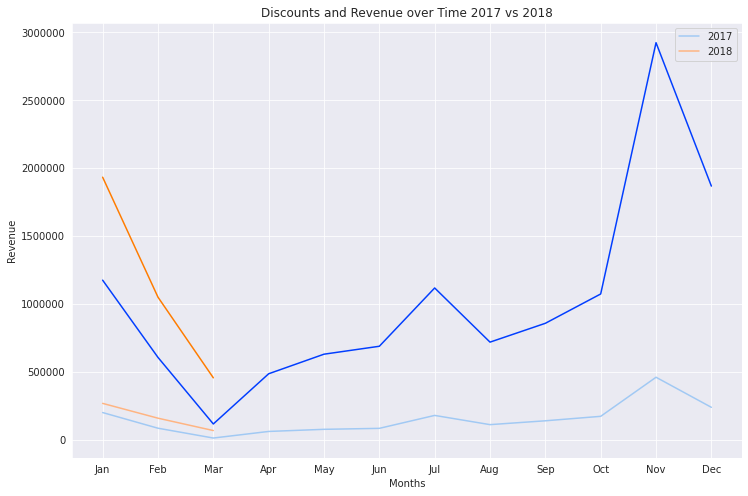

In [ ]:
# define the size of the plot
# using matplotlib (plt), which operates together with seaborn

plt.subplots(figsize=(12, 8))

sns.set_style("darkgrid") # darkgrid, whitegrid, dark, white, and ticks.
sns.set_palette("pastel") # deep, muted, pastel, bright, dark, and colorblind

# p = sns.barplot(data=df,
#                 x='',
#                 y='',
#                 hue='',
#                 order=[],
#                 ci="sd"
#                 estimator=) # np.median for median and len to calculate the number of times a particular value appears in the y column


total_discount_p = (sns.lineplot(data=df_discounts,
                 x='month',
                 y='total_discount',
                  hue='year', ))

revenue_p = (sns.lineplot(data=df_discounts,
                 x='month',
                 y='revenue',
                 hue='year', palette="bright"))
# sns.set_style("") # darkgrid, whitegrid, dark, white, and ticks.

# add a horizontal reference line into the chart to know where the mean value will be
# p.axhline(
#     df['y'].mean(), # value where you want to add your reference line
#     linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
#     color='gray')

# plt.xlim('Oct','Dec') # define a limit to put focus on your chart
# plt.ylim('Oct','Dec') # define a limit to put focus on your chart

plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Discounts and Revenue over Time 2017 vs 2018')

plt.legend(labels=['2017', '2018'])

plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

# sns.despine() # remove the top and right margin, to make your plot prettier

# sns.set_style("") # darkgrid, whitegrid, dark, white, and ticks.

plt.show()

The plot supports the idea that offering discounts is beneficial in the long run